In [38]:
from scipy.special import eval_hermite
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.colors as mcol
import imageio
import os

In [2]:
path='/Users/vayer/Documents/res/'

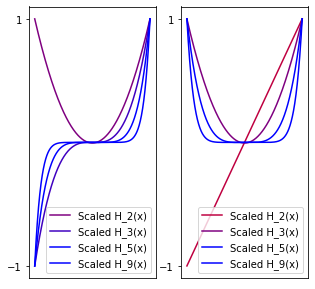

In [3]:
Nmax=4
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])
cnorm = mcol.Normalize(vmin=0,vmax=Nmax)
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
cpick.set_array([])

x=np.linspace(-10,10,1000)
leg=[]
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
for k in [(2**j)+1 for j in range(Nmax)]:
    plt.plot(x,eval_hermite(k,x)/np.max(eval_hermite(k,x)),color=cpick.to_rgba(k))
    leg.append('Scaled H_{0}(x)'.format(k))
    plt.legend(leg)
    plt.xticks([])
    plt.yticks([-1,1])
    
plt.subplot(1,2,2)
for k in [(2**j) for j in range(Nmax)]:
    plt.plot(x,eval_hermite(k,x)/np.max(eval_hermite(k,x)),color=cpick.to_rgba(k))
    leg.append('Scaled H_{0}(x)'.format(k))
    plt.legend(leg)
    plt.xticks([])
    plt.yticks([-1,1])

Text(0.5, 1.0, 'Scaled H_n(x) for $n\\in [1,10]$')

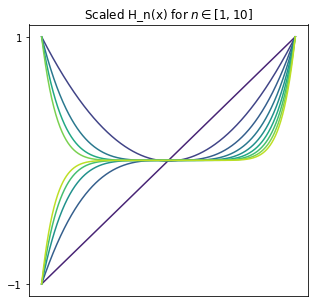

In [4]:
Nmax=10
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])
cnorm = mcol.Normalize(vmin=0,vmax=Nmax)
cpick = cm.ScalarMappable(norm=cnorm,cmap='viridis')
cpick.set_array([])

x=np.linspace(-10,10,1000)
leg=[]
plt.figure(figsize=(5,5))
for k in range(1,Nmax):
    plt.plot(x,eval_hermite(k,x)/np.max(eval_hermite(k,x)),color=cpick.to_rgba(k))
    leg.append('Scaled H_{0}(x)'.format(k))
    #plt.legend(leg)
plt.xticks([])
plt.yticks([-1,1])
plt.title('Scaled H_n(x) for $n\in [1,{}]$'.format(Nmax))
    

In [5]:
import ot
def return_bary(ts1,ts2,alpha,type_='ot'):
    A = np.vstack((ts1, ts2)).T
    n=A.shape[0]

    weights = np.array([1 - alpha, alpha])
    if type_=='l2':
        bary = A.dot(weights)
    elif type_=='ot':
        M = ot.utils.dist0(n)
        M /= M.max()
        reg = 1e-3
        bary = ot.bregman.barycenter(A, M, reg, weights)        
    return bary

In [6]:
ts1=np.array(eval_hermite(1,x)/np.max(eval_hermite(1,x)))
ts2=np.array(eval_hermite(2,x)/np.max(eval_hermite(2,x)))

1
2
3
4
5
6
7
8


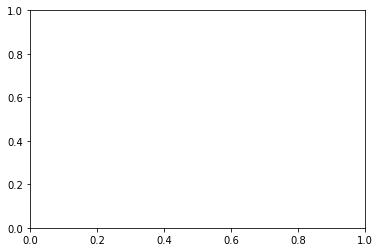

In [107]:
Nmax=9
alphamax=50
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["r","b"])
cnorm = mcol.Normalize(vmin=0,vmax=Nmax*alphamax)
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
cpick.set_array([])
j=0
x=np.linspace(-10,10,1000)
j=0
fig, ax = plt.subplots()
for k in range(1,Nmax):
    print(k)
    ts1=np.array(eval_hermite(k,x))
    ts2=np.array(eval_hermite(k+1,x)) 
    for alpha in np.linspace(0,1,alphamax):
        #fig=plt.figure(figsize=(5,5))
        bary=return_bary(ts1,ts2,alpha=alpha,type_='l2')
        plt.plot(x,bary,color=cpick.to_rgba(j))
        plt.legend(['$H_{0}(x)$ -> $H_{1}(x)$'.format(k,k+1)],loc='upper right',fontsize=13)
        figname = path+str(j)+'.png'
        dest = os.path.join(path, figname)
        plt.savefig(dest)
        plt.cla()
        j=j+1

In [108]:
import re
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [109]:
filenames=sorted_aphanumeric(os.listdir(path))
files=[path+f for f in filenames if 'png' in f]
images = []
for filename in files:
    images.append(imageio.imread(filename))
    
imageio.mimsave(path+'hermit.gif', images,fps=10)

In [113]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [114]:
ts1=np.array(eval_hermite(2,x))

Text(0.5, 1.0, '$e^{ix}$')

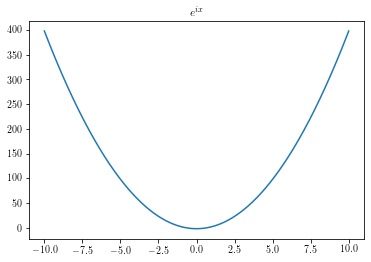

In [115]:
plt.plot(x,ts1)
plt.title('$e^{ix}$')

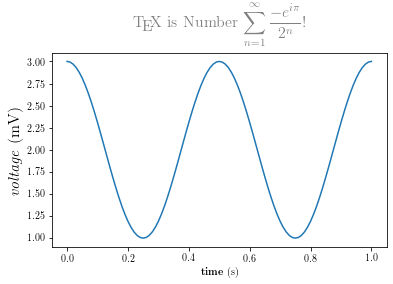

In [116]:
import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.savefig('tex_demo')
plt.show()

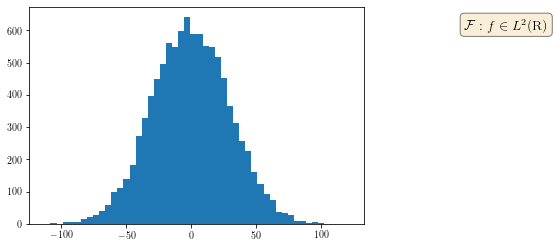

In [137]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

fig, ax = plt.subplots()
x = 30*np.random.randn(10000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = '$\mathcal{F}: f\in L^{2}(\mathrm{R}) $'

ax.hist(x, 50)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(1.3, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.savefig(path+'test.pdf')

plt.show()